In [1]:
# all bibliotheques necessaires of this TP
import numpy as np
import matplotlib.pyplot as plt

#### Remark
In this project i use some references 
- course
- https://zingale.github.io/computational_astrophysics/advection/burgers/burgers-methods.html
- file:///C:/Users/hp/Downloads/978-0-8176-8265-1.pdf
- file:///C:/Users/hp/Downloads/978-0-387-87823-2.pdf


# Linear Transport

The linear transport equation for $ \Omega \subset \mathbb{R} $ is given by:

$$
\begin{cases} 
\partial_t u + c \partial_x u = 0, & \text{on } \Omega \times (0, T), \\
u(b, t) = g(t), & t \in (0, T), \\
u(x, 0) = u_0(x), & x \in \Omega. 
\end{cases}
$$

### (a) Deriving a Weak Solution
Let  c < 0 be the transport speed. Derive a weak solution to the following boundary value problem for $ \Omega = [0, b] $,  T > 0 . Implement the solution in a function called `exact_lin_transport`.










## Answers

### Weak Solution for \( c < 0 \)

Let c < 0, which indicates that the wave is moving to the left. The weak solution for the linear transport equation can be derived by considering the characteristics of the PDE.

The transport equation:

$$
\partial_t u + c \partial_x u = 0
$$

The characteristic curves associated with the transport equation are the parameterized curves

$$ 
 t \mapsto (X(t), t) \quad with \quad X(0) = X_0 \in \mathbb{R} 
$$
 
where $ X(t) $ is the solution of:

$$
X'(t) = c \quad X(0) = X_0.
$$

Thus, the characteristics are the straight lines 
$$
 X(t) = X_0 + ct 
$$

This means that the solution $ u(x,t) $ is constant along the lines $ X(t) = X_0 + ct $, where $ X_0 $ is the initial position at time $ t = 0 $. Hence, the solution along the characteristics can be written as:

$$
u(X(t), t) = u(X(0), 0) = u_0(X(0)) = u_0(X_0).
$$

Let 
$$ 
x = X(t) = X_0 + ct 
$$
then we have $ X_0 = x - ct $.  

Thus:
$$
u(x, t) = u_0(x - ct),
$$

where $ u_0 $ is the initial condition given at $ t = 0 $.

In this case, we have the boundary condition given by:

$$
u(b, t) = g(t), \quad t \in (0, T), \\
u(x, 0) = u_0(x), \quad x \in \Omega.
$$

Since $ c < 0 $, the transport speed is negative, meaning the boundary condition is applied at $ x = b $. Specifically, we have:

$$
u(b, t) = g(t).
$$

We follow the characteristics, meaning that:

$$
u(x, t) = u_0(x - ct) \quad \text{for } x - ct < b.
$$

On the other hand, for 
$$ 
X(t') = x' = b = X_0 + ct' 
$$
we get:
$$
ct' = b - X_0 \quad \text{or} \quad ct' = b - (x - ct) \quad \Rightarrow \quad t' = \frac{b - x}{c} + t.
$$

Thus, we have:

$$
u(x, t) = g\left(t + \frac{b - x}{c}\right) \quad \text{for } x - ct \geq b.
$$

Finally, the solution for \( u(x,t) \) is given by:

$$
u(x, t) =
\begin{cases} 
u_0(x - ct), & \text{for } x - ct < b, \\
g\left(t + \frac{b - x}{c}\right), & \text{for } x - ct \geq b.
\end{cases}
$$

This form satisfies both the initial condition and the boundary condition for \( c < 0 \).


In [2]:
# implementation of the exact solution for the linear transport equation
def exact_lin_transport(x, t, c, u0, g, b, N): 
    u = np.zeros_like(x)
    for i in range(N):
        if x[i] - c * t >= 0 and x[i] - c * t < b:
            u[i] = u0(x[i] - c * t)
        else:
            u[i] = g((b - x[i]) / c + t)
    
    return u

### (b) Mesh Routine
Program a routine `Mesh` (struct in Julia or a class or function in Python) which takes as input variables:
- The number of cells  N ,
- The interval boundaries  [0, b] ,
and returns:
- The cell size $ \Delta x $,
- The number of cell interfaces  N_f ,
- The vector of cell centers  x_i  for i = 1, $\ldots$, N ,
- The vector of cell interfaces $ x_{i+1/2} $ for $ i = 0, \ldots, N $.



In [3]:
# The class of Mesh 
class Mesh:
    # I take also a for the second exercise
    def __init__(self, N,a, b):
        self.N = N
        self.a = a
        self.b = b
        self.dx = (b - a) / N
        self.Nf = N + 1
        self.cell_centers = np.linspace(a, b , N)
        self.cell_interfaces = [a + (i + 0.5) *self.dx  for i in range(self.Nf)]
    
    def get_dx(self):
        return self.dx
    
    def get_Nf(self):
        return self.Nf
    
    def get_cell_centers(self):
        return self.cell_centers
    
    def get_cell_interfaces(self):
        return self.cell_interfaces
print("Mesh class is defined")
Mesh(10,0, 1).get_cell_centers()
Mesh(10,0, 1).get_cell_interfaces()


Mesh class is defined


[0.05,
 0.15000000000000002,
 0.25,
 0.35000000000000003,
 0.45,
 0.55,
 0.65,
 0.75,
 0.8500000000000001,
 0.9500000000000001,
 1.05]

### (c) Godunov Scheme
Implement the Godunov scheme using the exact solution of the Riemann problem. For the boundary values, the exact solution can be used. To do this, write functions `RS_transport(uL, uR, xi)` and `NumFlux_Godunov(uL, uR)`.



## Answers
The Rankine-Hugoniot (RH) condition for a Riemann problem for the transport equation is given by:

$$
u(x, t) =
\begin{cases} 
u_L, & \text{for } \frac{x}{t} < \sigma, \\ 
u_R, & \text{for } \frac{x}{t} > \sigma.
\end{cases}
$$

Where $ \sigma $ is the shock speed. To determine $ \sigma $, we use the RH condition:

$$
f(u_L) - f(u_R) = \sigma (u_L - u_R).
$$

For the transport equation, the flux function $ f(u) $ is linear and given by $ f(u) = cu $, where $ c $ is the transport speed. Substituting into the RH condition:

$$
c u_L - c u_R = \sigma (u_L - u_R).
$$

It’s easy to conclude that:

$$
\sigma = c.
$$

Thus, the shock speed $ \sigma $ is equal to the transport speed $ c $.

Based on this condition, we can implement the function `RS_transport` for the Riemann solver.


In [4]:
# The function Rs_transport
def RS_transport(uL, uR, xi,c):
        if xi <c:
            return uL
        else:    
            return uR


In the cours the Godunov flux is then given by 
$$
 F(uL,uR) = f(R(uL,uR,0)) 
$$
so in this case we have $ f(u) = cu $

thus,
$$
 F(uL,uR) = c R(uL,uR,0) 
$$

In [5]:
# function NumFlux_Godunov
def NumFlux_Godunov(uL, uR, c):
    return c*RS_transport(uL, uR, 0, c)

### (d) Numerical Solution Using Godunov Scheme
Solve the boundary value problem from (a) numerically using the Godunov scheme for the boundary values:
- $ g_1(t) = \sin(2\pi t) $,
- $ g_2(t) = \sin(2\pi t) + 1 $,
and the initial condition $ u_0(x) = 0 $.

Write a function `Godunov_scheme` using the numerical flux from (c) and apply it to the cases $ c = -1, -2 $, with $ b = 1 $ and $ T = 0.75 $. Plot the numerical solution against the exact solution obtained in (a) by choosing an adequate number of cells $ N $. Plot the obtained solutions against their respective exact solution.

In [6]:
def Godunov_scheme(N,a, b, T, c, g, u0):
    # mesh creation and initialization
        mesh = Mesh(N,a, b)
        # mesh parameters
        dx = mesh.get_dx()
        dt = 0.5 * dx / abs(c)  # CFL condition for stability  of the scheme
        Nt = int(T / dt)
        x = mesh.get_cell_interfaces()
        # initial condition for t=0
        u = exact_lin_transport(x, 0, c, u0, g, b, N )
        # time loop
        for n in range(Nt):
            # time
            t = n * dt
            # new solution copy
            u_new = np.zeros_like(u)
            # boundary conditions if x = 0 becouse i use the cell interfaces ponderated by 0.5
            if -c*t>b:
               u_new[0] = g(t + b/c)
            for i in range(1, N-1):
                flux_left = NumFlux_Godunov(u[i-1], u[i],c)
                flux_right = NumFlux_Godunov(u[i], u[i+1],c)
                u_new[i] = u[i] - (dt / dx) * (flux_right-flux_left)
            u_new[N-1] = g(t)
            u = u_new
        return x, u

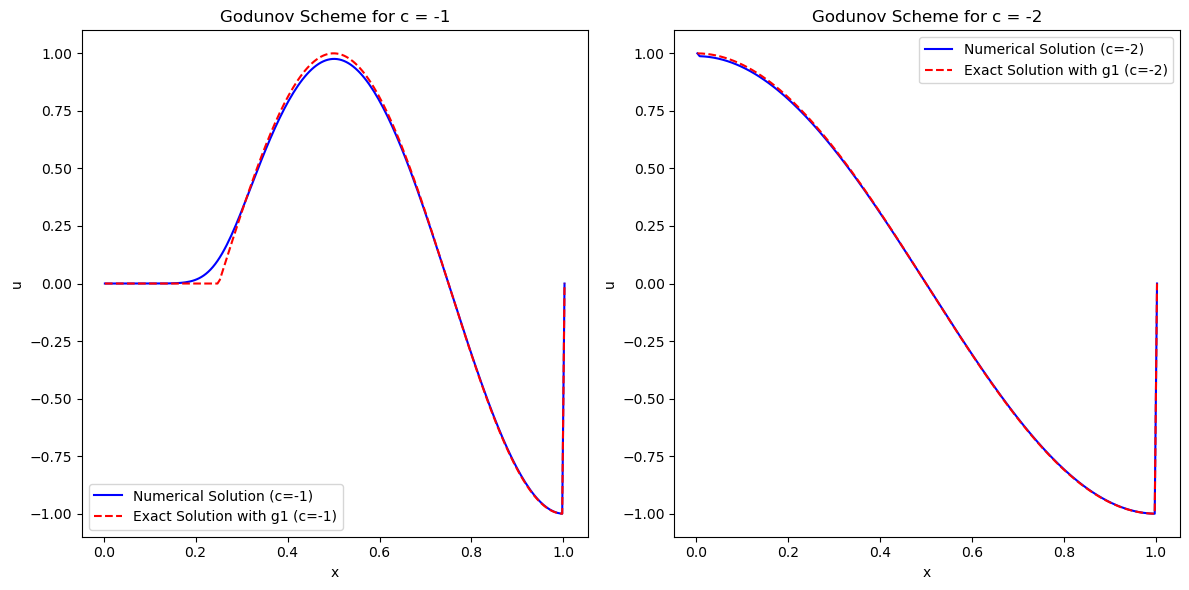

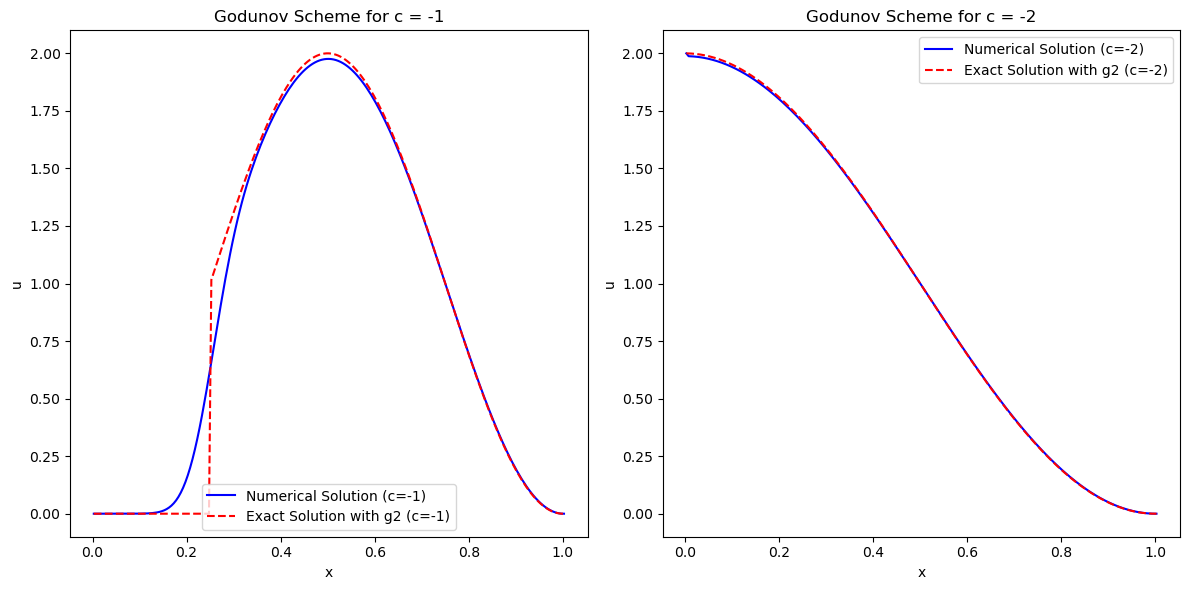

In [7]:
# Boundary values and initial condition
g1 = lambda t: np.sin(2 * np.pi * t)
g2 = lambda t: np.sin(2 * np.pi * t) + 1
u0 = lambda x: 0

# Parameters
a = 0.0
b = 1.0
T = 0.75
N = 200

# g1 and c = -1, -2
c = [-1, -2]

# Plot for g1
plt.figure(figsize=(12, 6))
for i in range(2):
    x, u_num = Godunov_scheme(N,a, b, T, c[i], g1, u0)
    u_exact = exact_lin_transport(x, T, c[i], u0, g1, b, N)
    plt.subplot(1, 2, i + 1)
    plt.plot(x, u_num, 'b-', label='Numerical Solution (c={})'.format(c[i]))
    plt.plot(x, u_exact, 'r--', label='Exact Solution with g1 (c={})'.format(c[i]))
    plt.xlabel('x')
    plt.ylabel('u')
    plt.title('Godunov Scheme for c = {}'.format(c[i]))
    plt.legend()
plt.tight_layout()
plt.show()

# Plot for g2
plt.figure(figsize=(12, 6))
for i in range(2):
    x, u_num = Godunov_scheme(N,a, b, T, c[i], g2, u0)
    u_exact = exact_lin_transport(x, T, c[i], u0, g2, b, N)
    plt.subplot(1, 2, i + 1)
    plt.plot(x, u_num, 'b-', label='Numerical Solution (c={})'.format(c[i]))
    plt.plot(x, u_exact, 'r--', label='Exact Solution with g2 (c={})'.format(c[i]))
    plt.xlabel('x')
    plt.ylabel('u')
    plt.title('Godunov Scheme for c = {}'.format(c[i]))
    plt.legend()
plt.tight_layout()
plt.show()

### (e) L1 Error Calculation
Calculate the $ L_1 $ error at $ T = 0.75 $ for successively refined meshes $ N_i = N \cdot i, i = 2^k, k = 1, \ldots, 5, N = 50 $ and $ c = -1 $ using $ g_1(t) $ and $ g_2(t)$ .

Plot the errors as a function of the space increment $ \Delta x $ in a log-log plot.

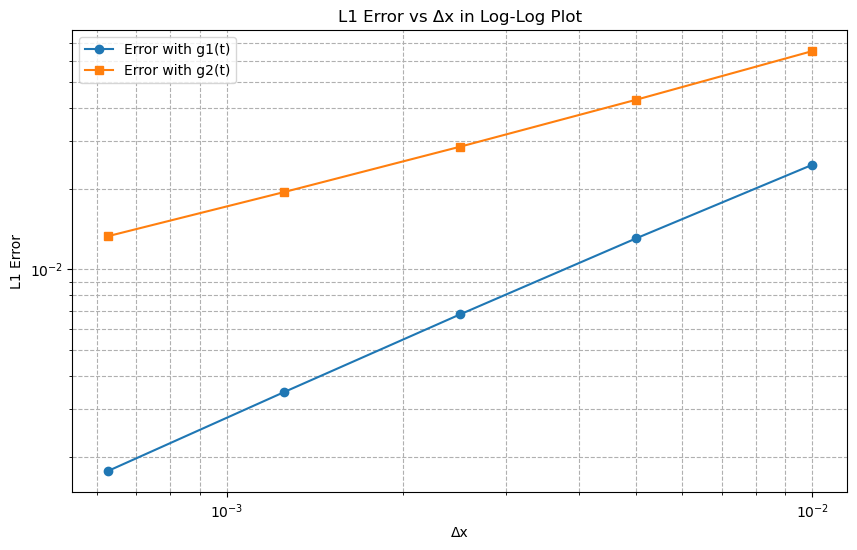

In [8]:
# define the L1 error function
def L1_error(u_num, u_exact, dx):
    return np.sum(np.abs(u_num - u_exact)) * dx
# Two lists to store the errors
errors_g1 = []
errors_g2 = []
# list to store the dx values
dx_values = []
N = 50
for k in range(1, 6):
    # meshs refinement
    Ni = N * (2 ** k)
    mesh = Mesh(Ni, a, b)
    dx = mesh.get_dx()
    c = -1
    dx_values.append(dx)
    x, u_num_g1 = Godunov_scheme(Ni,a, b, T, c, g1, u0)
    u_exact_g1 = exact_lin_transport(x, T, c, u0, g1, b, Ni)
    error_g1 = L1_error(u_num_g1, u_exact_g1, dx)
    errors_g1.append(error_g1)
    
    x, u_num_g2 = Godunov_scheme(Ni,a, b, T, c, g2, u0)
    u_exact_g2 = exact_lin_transport(x, T, c, u0, g2, b, Ni)
    error_g2 = L1_error(u_num_g2, u_exact_g2, dx)
    errors_g2.append(error_g2)

# Plot the errors in a log-log plot
plt.figure(figsize=(10, 6))
plt.loglog(dx_values, errors_g1, 'o-', label='Error with g1(t)')
plt.loglog(dx_values, errors_g2, 's-', label='Error with g2(t)')
plt.xlabel('Δx')
plt.ylabel('L1 Error')
plt.title('L1 Error vs Δx in Log-Log Plot')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

What is the slope (approximately) of the obtained curve? What do you observe? What could be the reason for the different slopes?

In [9]:
# Calculate the slope of the curve
slope_g1 = np.polyfit(np.log(dx_values), np.log(errors_g1), 1)[0]
slope_g2 = np.polyfit(np.log(dx_values), np.log(errors_g2), 1)[0]

print(f"Slope for g1(t): {slope_g1:.2f}")
print(f"Slope for g2(t): {slope_g2:.2f}")

Slope for g1(t): 0.95
Slope for g2(t): 0.57


We can observe a difference between these two slopes because for $ g_1 $, if $\Delta  x \to 0$, the slope converges to $1$, whereas for $ g_2 $, it converges to $0.56$.

The difference between the two slopes is due to the CFL condition. In this code, I implemented the condition such that:

$$
\text{CFL} = \frac{\Delta t}{\Delta x} \leq \frac{1}{2 \max |f'(u)|}.
$$

In this case, I used:

$$
\text{CFL} = \frac{1}{2 \max |f'(u)|} = \frac{1}{2|c|}.
$$

This condition explains the difference between the two slopes because I used the maximum CFL value. If we take a CFL value less than this quantity, we can find that the results converge for both functions. This gives an important idea about the speed of convergence. We know that if the CFL is less than the specified quantity, the number of iterations increases. This assumption explains the observed difference.

### (f) MUSCL Scheme with SSP-RK2 Method
Implement the MUSCL scheme based on the Godunov numerical flux with second-order time integration using the SSP-RK2 method. Write a function `minmod(alpha, beta, gamma)` and a function `slopes(u, uL, uR, Nc)`.



In [10]:
# The first function is minmod 
def minmod(alpha, beta, gamma):
    cond1 = (alpha > 0) & (beta > 0) & (gamma > 0)
    cond2 = (alpha < 0) & (beta < 0) & (gamma < 0)
    if np.all(cond1):
        return np.min([alpha, beta, gamma])
    elif np.all(cond2):
        return np.max([alpha, beta, gamma])
    else:
        return 0

In [11]:
# I implement the slopes function in our course
def slopes(u, uL, uR, Nc,dx):
    s = np.zeros_like(u)
    for i in range(1, Nc-1):
        s[i] = minmod((u[i] - u[i-1])/dx, (u[i+1] - u[i]) / dx, (u[i+1] - u[i-1])/2*dx)
    s[0] = minmod((u[0] - uL)/dx, (u[1] - u[0])/dx, (u[1] - uL) / 2*dx)
    s[Nc-1] = minmod((u[Nc-1] - u[Nc-2])/dx, (uR - u[Nc-1]) / dx, (uR - u[Nc-2]) / 2*dx)
    return s

In [12]:
# Implemention Muscl scheme  
def MUSCL_scheme(N,alpha, b, T, c, g):
    mesh = Mesh(N,alpha, b)
    dx = mesh.get_dx()
    dt = 0.5*dx / abs(c)  # I use the creterion of course
    Nt = int(T / dt)
    x = mesh.get_cell_interfaces()
    # condition initial with t=0
    u = exact_lin_transport(x, 0, c, u0, g, b, N)
    for n in range(Nt):
        t = n * dt
        uL = np.zeros(N)
        uR = np.zeros(N)
        ur = g(t)
        ul = 0
        
        # Compute slopes
        s = slopes(u, ul, ur, N, dx)

        for i in range(1, N-1):
            uL[i] = u[i] + dx/2 * s[i]
            uR[i] = u[i] + dx/2 * s[i + 1]
        uR[N-1] = g(t)
        
        u_new = np.zeros_like(u)
        if -c * t > b:
            u_new[0] = g(t + b / c) # it the same becouse I decalate the mesh by 0.5
        for i in range(1, N-1):
            flux_left = NumFlux_Godunov(uL[i-1], uR[i], c)
            flux_right = NumFlux_Godunov(uL[i], uR[i+1], c)
            u_new[i] = u[i] - dt / dx * (flux_right - flux_left)
        #  bondary condition at x = b
        u_new[N-1] = g(t)
        u = u_new
    
    return x, u


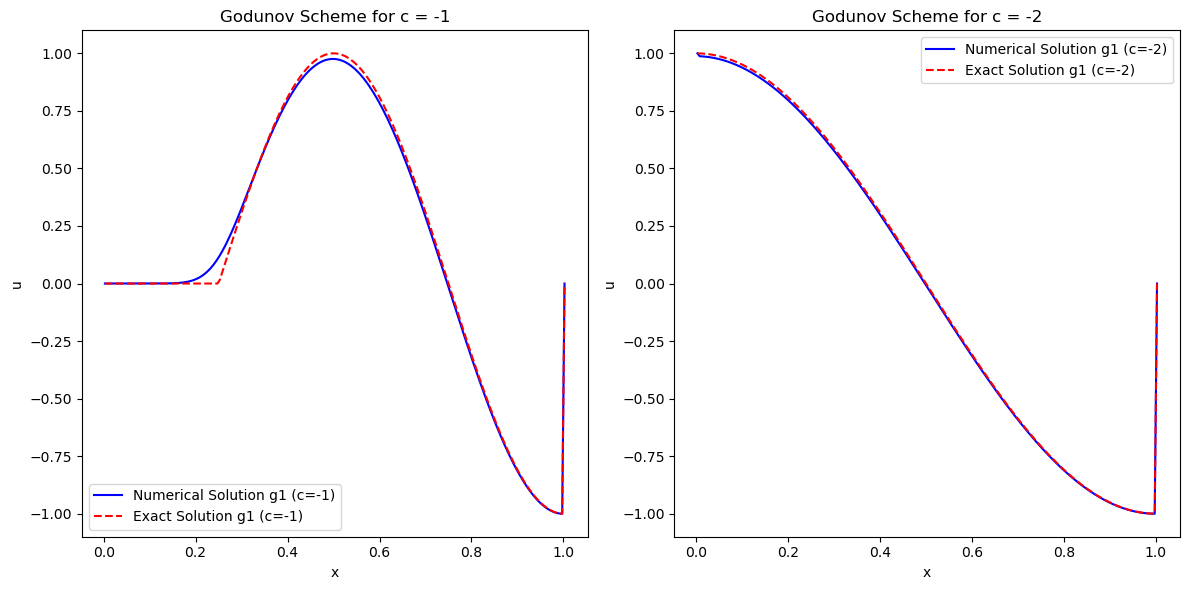

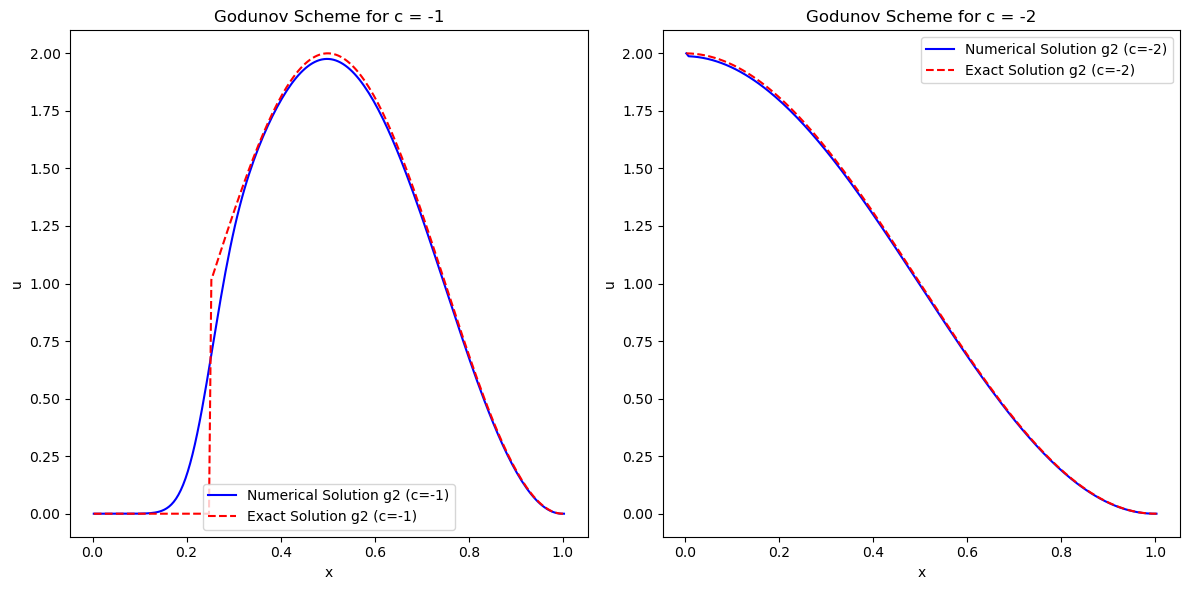

In [13]:
# Boundary values and initial condition
g1 = lambda t: np.sin(2 * np.pi * t)
g2 = lambda t: np.sin(2 * np.pi * t) + 1
u0 = lambda x: 0

# Parameters
a = 0.0
b = 1.0
T = 0.75
N = 200

# g1 and c = -1, -2
c = [-1, -2]

# Plot for g1
plt.figure(figsize=(12, 6))
for i in range(2):
    x, u_num = MUSCL_scheme(N,a, b, T, c[i], g1)
    u_exact = exact_lin_transport(x, T, c[i], u0, g1, b, N)
    plt.subplot(1, 2, i + 1)
    plt.plot(x, u_num, 'b-', label='Numerical Solution g1 (c={})'.format(c[i]))
    plt.plot(x, u_exact, 'r--', label='Exact Solution g1 (c={})'.format(c[i]))
    plt.xlabel('x')
    plt.ylabel('u')
    plt.title('Godunov Scheme for c = {}'.format(c[i]))
    plt.legend()
plt.tight_layout()
plt.show()

# Plot for g2
plt.figure(figsize=(12, 6))
for i in range(2):
    x, u_num = MUSCL_scheme(N, a, b, T, c[i], g2)
    u_exact = exact_lin_transport(x, T, c[i], u0, g2, b, N)
    plt.subplot(1, 2, i + 1)
    plt.plot(x, u_num, 'b-', label='Numerical Solution g2 (c={})'.format(c[i]))
    plt.plot(x, u_exact, 'r--', label='Exact Solution g2 (c={})'.format(c[i]))
    plt.xlabel('x')
    plt.ylabel('u')
    plt.title('Godunov Scheme for c = {}'.format(c[i]))
    plt.legend()
plt.tight_layout()
plt.show()

Apply the MUSCL scheme on the initial data and boundary values given in (c) and repeat the tasks of (e) with:
-  T = 2  when using  $ g_1(t) $ ,
-  T = 0.75  for the case  $ g_2(t) $.

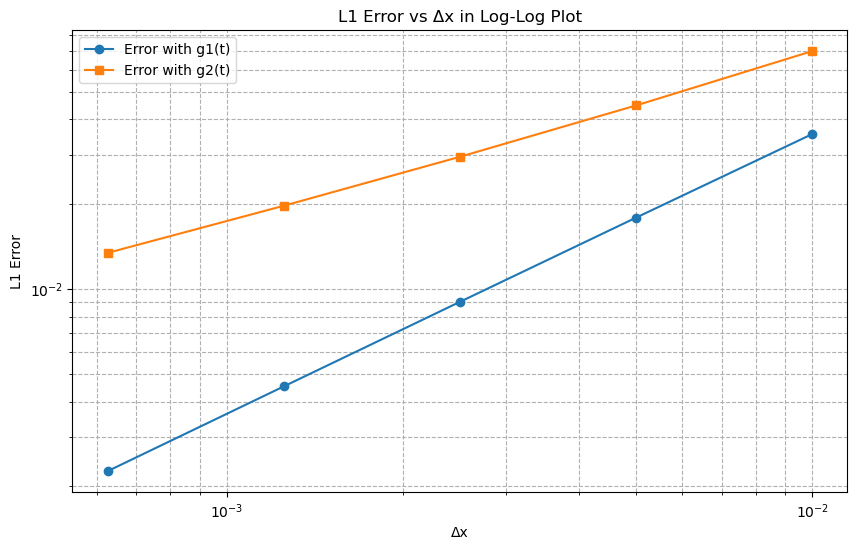

In [14]:
# Two lists to store the errors
errors_g1 = []
errors_g2 = []
# list to store the dx values
dx_values = []
N = 50
for k in range(1, 6):
    Ni = N * (2 ** k)
    mesh = Mesh(Ni, a, b)
    dx = mesh.get_dx()
    c = -1
    dx_values.append(dx)
    # g1 with T = 0.75
    T = 2
    x, u_num_g1 = MUSCL_scheme(Ni,a, b, T, c, g1)
    u_exact_g1 = exact_lin_transport(x, T, c, u0, g1, b, Ni)
    error_g1 = L1_error(u_num_g1, u_exact_g1, dx)
    errors_g1.append(error_g1)
    # g2 with T = 2
    T = 0.75
    x, u_num_g2 = MUSCL_scheme(Ni,a, b, T, c, g2)
    u_exact_g2 = exact_lin_transport(x, T, c, u0, g2, b, Ni)
    error_g2 = L1_error(u_num_g2, u_exact_g2, dx)
    errors_g2.append(error_g2)

# Plot the errors in a log-log plot
plt.figure(figsize=(10, 6))
plt.loglog(dx_values, errors_g1, 'o-', label='Error with g1(t)')
plt.loglog(dx_values, errors_g2, 's-', label='Error with g2(t)')
plt.xlabel('Δx')
plt.ylabel('L1 Error')
plt.title('L1 Error vs Δx in Log-Log Plot')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.show()

In [15]:
# Calculate the slope of the curve
slope_g1 = np.polyfit(np.log(dx_values), np.log(errors_g1), 1)[0]
slope_g2 = np.polyfit(np.log(dx_values), np.log(errors_g2), 1)[0]

print(f"Slope for g1(t): {slope_g1:.2f}")
print(f"Slope for g2(t): {slope_g2:.2f}")

Slope for g1(t): 0.99
Slope for g2(t): 0.59


In this case, we can arrive at the same idea because we have a difference in $T $. The speed of convergence is different, which is reflected in the slopes. If $ T $ goes to infinity, the number of iterations also increases. This explains how the second function also arrives at the same convergence as the first one if $T $ is increased.

# Exercice 2 : Non-linear scalar conservation laws

(a) Derive an admissible weak solution to the following initial value problem

$$
\begin{cases}
\partial_t u + \partial_x \left( \frac{u^2}{d} \right) = 0, & (x, t) \in (-1, 2) \times (0, T), \\
u(-1, t) = 1, & t \in (0, T)
\end{cases}
$$

$$
u(x, 0) = 
\begin{cases} 
1 & \text{if } x < 0, \\ 
1 - x & \text{if } 0 \leq x \leq 1, \\ 
0 & \text{if } x > 1. 
\end{cases}
$$
Therein ( d > 0 ). All steps must be justified!


## Ansewers

We start by deriving an admissible weak solution to the nonlinear transport equation.

Let $\phi \in C^\infty_c([-1, 2] \times [0, T], \mathbb{R})$ be a test function with compact support. We multiply the conservation law by $\phi$ and integrate over $[-1, 2] \times [0, T]$:

$$
\int_{-1}^{2} \int_{0}^{T} (\partial_t u + \partial_x f(u)) \phi \, dx \, dt = 0
$$

We integrate by parts the time derivative term:

$$
-\int_{-1}^{2} \int_{0}^{T} u \, \partial_t \phi \, dx \, dt + \int_{-1}^{2} \left[ u \phi \right]^{T}_{0} dx - \int_{-1}^{2} \int_{0}^{T} f(u) \, \partial_x \phi \, dx \, dt + \int_{0}^{T} \left[ f(u) \phi \right]_{-1}^{2} dt = 0
$$

Since $\phi$ has compact support, the boundary terms vanish, and we obtain:

$$
\int_{-1}^{2} \int_{0}^{T} \left( u \, \partial_t \phi + f(u) \, \partial_x \phi \right) dx \, dt - \int_{-1}^{2} u(x, 0) \phi(x, 0) \, dx = 0
$$

This is the weak formulation of the nonlinear transport equation associated with the initial condition $u(x, 0) = u_0(x)$ and the flux function $f(u) = \frac{u^2}{d}$ with $d > 0$.

Furthermore, the boundary condition $u(-1, t) = 1$ is satisfied.



We consider a boundary value problem for the nonlinear transport equation.  
The characteristic curves associated with the transport equation are the parameterized curves:

$$
 t \mapsto (X(t), t) \quad \text{with} \quad X(0) = X_0 \in \mathbb{R}.
$$

Here, $ X(t) $ is the solution of:

$$
X(t) = X_0 + f'(u)t \quad \text{with} \quad X(0) = X_0.
$$

Thus, the characteristics are straight lines:

$$
 X(t) = X_0 + \frac{2}{d} u(x,0) t.
$$

We analyze the regions based on the initial condition $ u(x, 0) $:

- **For the region $ x < 0 $, where $ u(x, 0) = 1 $:**

  $$
  X(t) = X_0 + \frac{2t}{d}.
  $$

- **For the region $ 0 \leq x \leq 1 $, where $ u(x, 0) = 1 - x $:**

  $$
  X(t) = X_0 + \frac{2}{d}(1 - x)t.
  $$

- **For the region $ x > 1 $, where $ u(x, 0) = 0 $:**

  $$
  X(t) = X_0.
  $$

Thus, the function $ X(t) $ is defined as:

$$
X(t) = 
\begin{cases}
X_0 + \frac{2t}{d}, & \text{if } X_0 < 0, \\
X_0 + \frac{2}{d}(1-x)t, & \text{if } 0 \leq X_0 \leq 1, \\
X_0, & \text{if } X_0 > 1.
\end{cases}
$$

### Finding the Strong Solution by the Method of Characteristics:

- **If $ X_0 < 0 $:**  
  The initial solution is given by $ u(X_0, 0) = 1 $. At a given instant $ t $, the characteristic corresponds to:

  $$
  X_0 = x - \frac{2t}{d}.
  $$

  Therefore, $ u(x, t) = 1 $ for $ X_0 < 0 $, which implies $ x < \frac{2t}{d} $.

- **If $ 0 \leq X_0 \leq 1 $:**  
  The initial solution is given by $ u(X_0, 0) = 1 - X_0 $. At a given instant $ t $, the characteristic corresponds to:

  $$
   X_0 = x - \frac{2}{d} (1 - X_0)t.
  $$

  Solving for $ X_0 $, we get:

  $$
   X_0 = \frac{x - \frac{2t}{d}}{1 - \frac{2t}{d}}.
  $$

  Therefore, the solution for $ u(x, t) $ is:

  $$
  u(x, t) = 1 - \frac{x - \frac{2t}{d}}{1 - \frac{2t}{d}}.
  $$

  To ensure this is valid, we check the condition $ 0 \leq \frac{x - \frac{2t}{d}}{1 - \frac{2t}{d}} \leq 1 $, which gives:

  $$
  0 \leq x - \frac{2t}{d} \leq 1 - \frac{2t}{d}.
  $$

  Thus, the range of $ x $ is:

  $$
  \frac{2t}{d} \leq x \leq 1.
  $$

- **If $ X_0 > 1 $:**  
  The initial solution is given by $ u(X_0, 0) = 0 $. At a given instant $ t $, the characteristic corresponds to:

  $$
  X_0 = x.
  $$

  Therefore, $ u(x, t) = 0 $ for $ X_0 > 1 $, which implies $ x > 1 $.

### Final Solution:

The solution is given by:

$$
u(x, t) =
\begin{cases}
1, & \text{if } x < \frac{2t}{d}, \\
\frac{1 - x}{1 - \frac{2t}{d}} & \text{if } \frac{2t}{d} \leq x \leq 1, \\
0 & \text{if } x > 1
\end{cases}
$$

for all $ (x, t) \in \mathbb{R} \times [0, t_c[$, where $ t_c $ is the critical time at which the characteristics intersect.

So, we have some questions concerning the time $ t_c $:
- What happens after the instant $ t_c $?
- Does a solution exist after the instant $ t_c $?

We answer these two questions by using the **Rankine-Hugoniot** condition to determine the time and speed of shocks in our problem. From our solution for $ u(x, t) $:

$$
u(x, t) =
\begin{cases}
1, & \text{if } x < \frac{2t}{d}, \\
\frac{1 - x}{1 - \frac{2t}{d}}, & \text{if } \frac{2t}{d} \leq x \leq 1, \\
0, & \text{if } x > 1,
\end{cases}
$$

we can identify a discontinuity point at the time when $ 1 - \frac{2t}{d} = 0 $, which gives $ d = 2t $, or $ t = \frac{d}{2} $.

Since

$$
\lim_{t \to \frac{d}{2}} u(x, t) =
\begin{cases}
1, & \text{if } x < \frac{d}{2}, \\
0, & \text{if } x > \frac{d}{2},
\end{cases}
$$

it implies that another solution exists after $ t_c $. Using the **Rankine-Hugoniot** condition, we can calculate the speed of the shock in this case as:

$$
\sigma = \frac{f(1) - f(0)}{1 - 0} = \frac{\frac{1}{d} - 0}{1 - 0} = \frac{1}{d}.
$$

For $ t \geq \frac{d}{2} $, the speed of propagation of the shock is $ \frac{1}{d} $. Thus, the shock curve equation is given by:

$$
X_c(t) = x_0 + \sigma (t - t_0),
$$

with $ t_0 = \frac{d}{2} $, and the initial position of the discontinuous point is given by $ x_0 = 1 $ if $ t > \frac{d}{2}$ at this time.
From the limit above, we have:

$$
X_c(t) = 1 + \frac{1}{d} (t - \frac{d}{2}) = \frac{d + 2t}{2d}.
$$

Thus, the solution after $ t_c $ is:

$$
u(x, t) =
\begin{cases}
1, & \text{if } x < \frac{d + 2t}{2d}, \\
0, & \text{if } x > \frac{d + 2t}{2d},
\end{cases}
\quad \forall t \geq \frac{d}{2}.
$$

Finally, the complete solution to our problem is given by:

$$
u(x, t) =
\begin{cases}
\begin{cases} 
1, & \text{if } x < \frac{2t}{d}, \\
\frac{1 - x}{1 - \frac{2t}{d}}, & \text{if } \frac{2t}{d} \leq x \leq 1, \\
0, & \text{if } x > 1,
\end{cases}
& \text{if } t < \frac{d}{2}, \\[8pt]
\begin{cases} 
1, & \text{if } x < \frac{d + 2t}{2d}, \\
0, & \text{if } x > \frac{d + 2t}{2d},
\end{cases}
& \text{otherwise}.
\end{cases}
$$















In [16]:
# Implementation of exact solution for the non-linear transport equation
def exact_nonlin_transport(x, t, N,d): 
    u = np.zeros_like(x)
    for i in range(N):
        # Time when the discontinuity of x
        if t< d/2:
            # Initial condition before the discontinuity
            if x[i] < 2*t/d:
               u[i] = 1
            elif (2*t / d)<=x[i] and x[i] <= 1:
               u[i] = (1 - x[i]) / (1 - (2*t/d))
            else:
               u[i] = 0
        else:
            # Initial condition after the discontinuity
            if x[i] <   (d + 2*t) / (2*d):
               u[i] = 1
            else :
               u[i] = 0
    return u

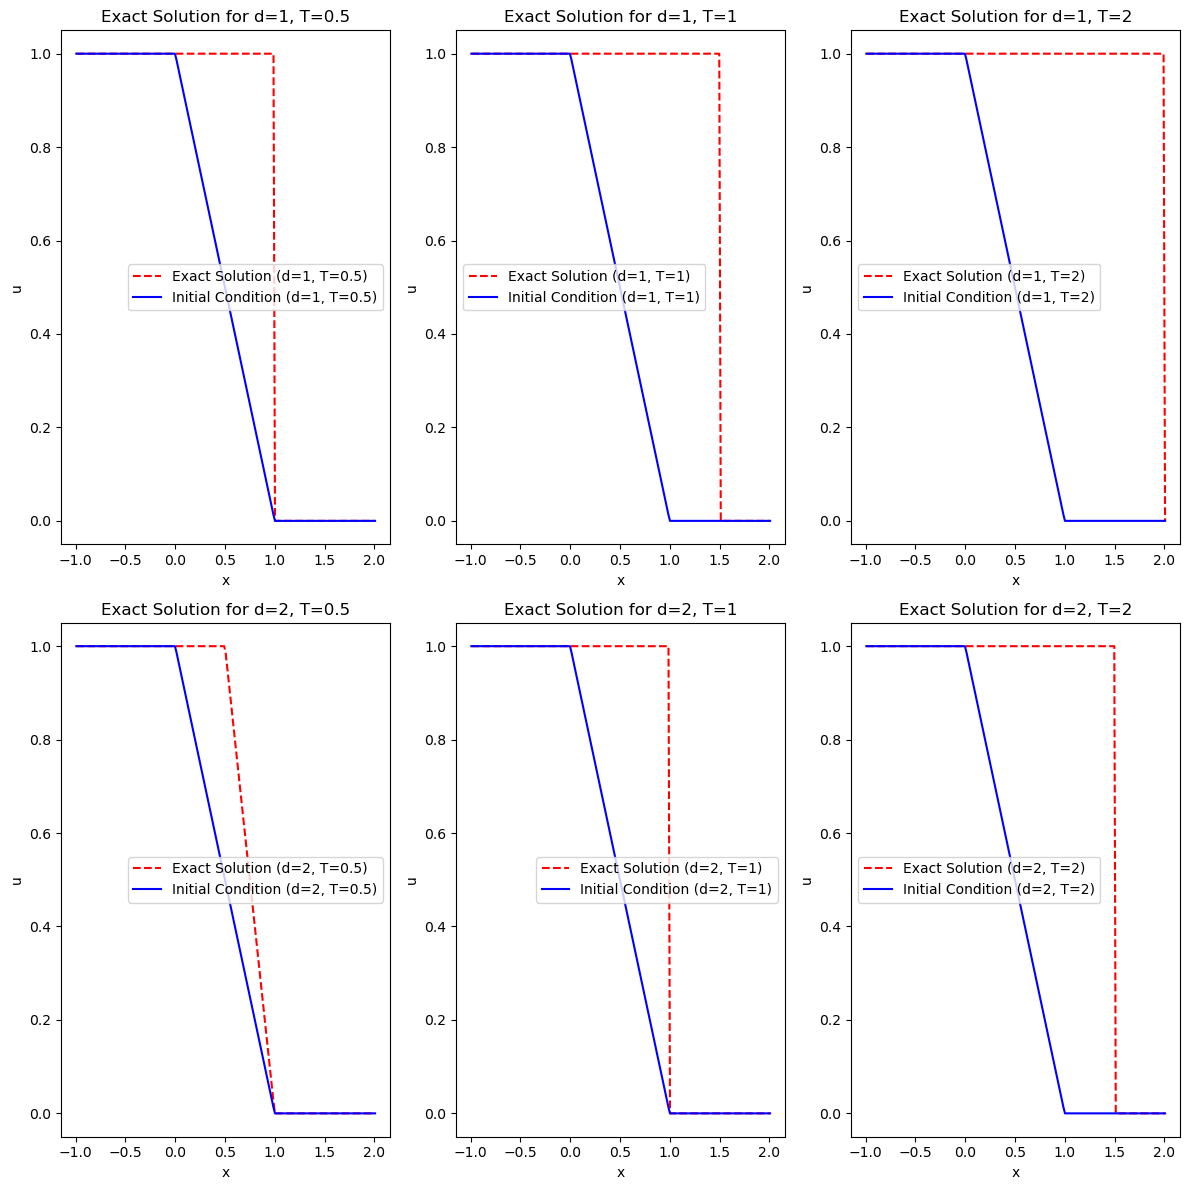

In [17]:
# example to test the exact solution
# Parameters
b = 2.0
a = -1.0
N = 200
x = Mesh(N, a, b).get_cell_interfaces()

# Test with different values of d and T
d_values = [1, 2]
T_values = [0.5, 1, 2]

plt.figure(figsize=(12, 12))

for i, d in enumerate(d_values):
    for j, T in enumerate(T_values):
        u_exact = exact_nonlin_transport(x, T, N, d)
        u0 = exact_nonlin_transport(x, 0, N, d) # Initial condition
        plt.subplot(len(d_values), len(T_values), i * len(T_values) + j + 1)
        plt.plot(x, u_exact, 'r--', label=f'Exact Solution (d={d}, T={T})')
        plt.plot(x, u0, 'b-', label=f'Initial Condition (d={d}, T={T})')
        plt.xlabel('x')
        plt.ylabel('u')
        plt.title(f'Exact Solution for d={d}, T={T}')
        plt.legend()

plt.tight_layout()
plt.show()


(b) Determine the Riemann solver $ R(u_L, u_R, \xi) $ associated to the scalar conservation law from (a).



## Answers

Based on the question, we have a discontinuous solution at $ x = 1 $ and $ t = \frac{d}{2} $:

$$
u(x, t) =
\begin{cases}
1, & \text{if } x < \frac{d + 2t}{2d}, \\
0, & \text{if } x > \frac{d + 2t}{2d},
\end{cases}
\quad \forall t \geq \frac{d}{2}.
$$

We can observe that $ u_L > u_R $, indicating that a shock is present.

In this case, we calculate the speed $ \sigma $ of the shock wave, which is determined by the Rankine-Hugoniot condition:

$$
\sigma = \frac{f(u_L) - f(u_R)}{u_L - u_R} = \frac{\frac{u_L^2}{d} - \frac{u_R^2}{d}}{u_L - u_R} = \frac{u_L + u_R}{d}.
$$

Therefore, the Riemann solver in this case is defined by the following formula:

$$
R(u_L, u_R, \xi) = 
\begin{cases}
u_L, & \text{if } \xi < \sigma, \\
u_R, & \text{if } \xi > \sigma.
\end{cases}
$$
The other hand, if $ uL < uR $ the Riemann solver in the cours if we have a function f is convex then:
$$
R(u_L, u_R, \xi) = 
\begin{cases}
u_L, & \text{if } \xi < f'(uL), \\
(f')^{-1}(\xi) & \text{if }  f'(uL) < \xi < f'(uR), \\
u_R, & \text{if } \xi > f'(uR).
\end{cases}
$$
thus,
$$
R(u_L, u_R, \xi) = 
\begin{cases}
u_L, & \text{if } \xi < \frac{2uL}{d}, \\
\frac{d\xi}{2} & \text{if }  \frac{2uL}{d} < \xi < \frac{2uR}{d}, \\
u_R, & \text{if } \xi > \frac{2uR}{d}.
\end{cases}
$$


(c) Solve the problem given in $(a)$ numerically with the Godunov scheme. Write a function RS_nonlinear(uL, uR, xi). Apply exact boundary conditions using the exact solution given in $(a)$.

Hint: You can reuse the Mesh, NumFlux_Godunov, Godunov_scheme routines from Exercise 1 if they are independent of the initial value problem.



In [18]:
# Implementation of Riemann solver for the non-linear transport equation
def RS_nonlinear(uL, uR, xi,d):
    if uL > uR:
        # case 1 with shock
        s = (uL + uR)/d
        if xi < s:
            return uL 
        else:
            return uR
    else:
        # case two rearefaction
        if xi < (2*uL/d):
            return uL
        elif xi > (2*uR/d):
            return uR
        else:
            return xi

In cours we have 
$$
F(uL,uR) = f(R(uL,uR,0))
$$
with $ f(u) = \frac{u^2}{d}$
thus,
$$
F(uL,uR) = \frac{R(uL,uR,0)^2}{d}
$$

In [19]:
# Flux function for the non-linear depend on d
def NumFlux_Godunov(uL, uR,d):
    return (1/d)* (RS_nonlinear(uL, uR, 0, d))**2

In [20]:
# Godunov scheme it is the same as the linear case just we need the constant d
def Godunov_scheme(N,a, b, T,d):
    # mesh creation and initialization
    mesh = Mesh(N,a,b)
    # mesh parameters using the mesh class
    x = mesh.get_cell_interfaces()
    dx = mesh.get_dx()
    dt =  0.25*dx*d   # CFL condition in this case the maximum value of the speed is 2/d
    Nt = int(T / dt)
    # initial condition u with t = 0
    u  = exact_nonlin_transport(x, 0, N,d) 

    for n in range(Nt):
        u_new = np.copy(u)
        # u_new[0] = 1 the condition at x = -1 is satisfied by the initial condition
        for i in range(1, N-1):
            flux_left = NumFlux_Godunov(u[i-1], u[i],d)
            flux_right = NumFlux_Godunov(u[i], u[i+1],d)
            u_new[i] = u[i] - dt / dx * (flux_right-flux_left)
        u = u_new

    return x, u

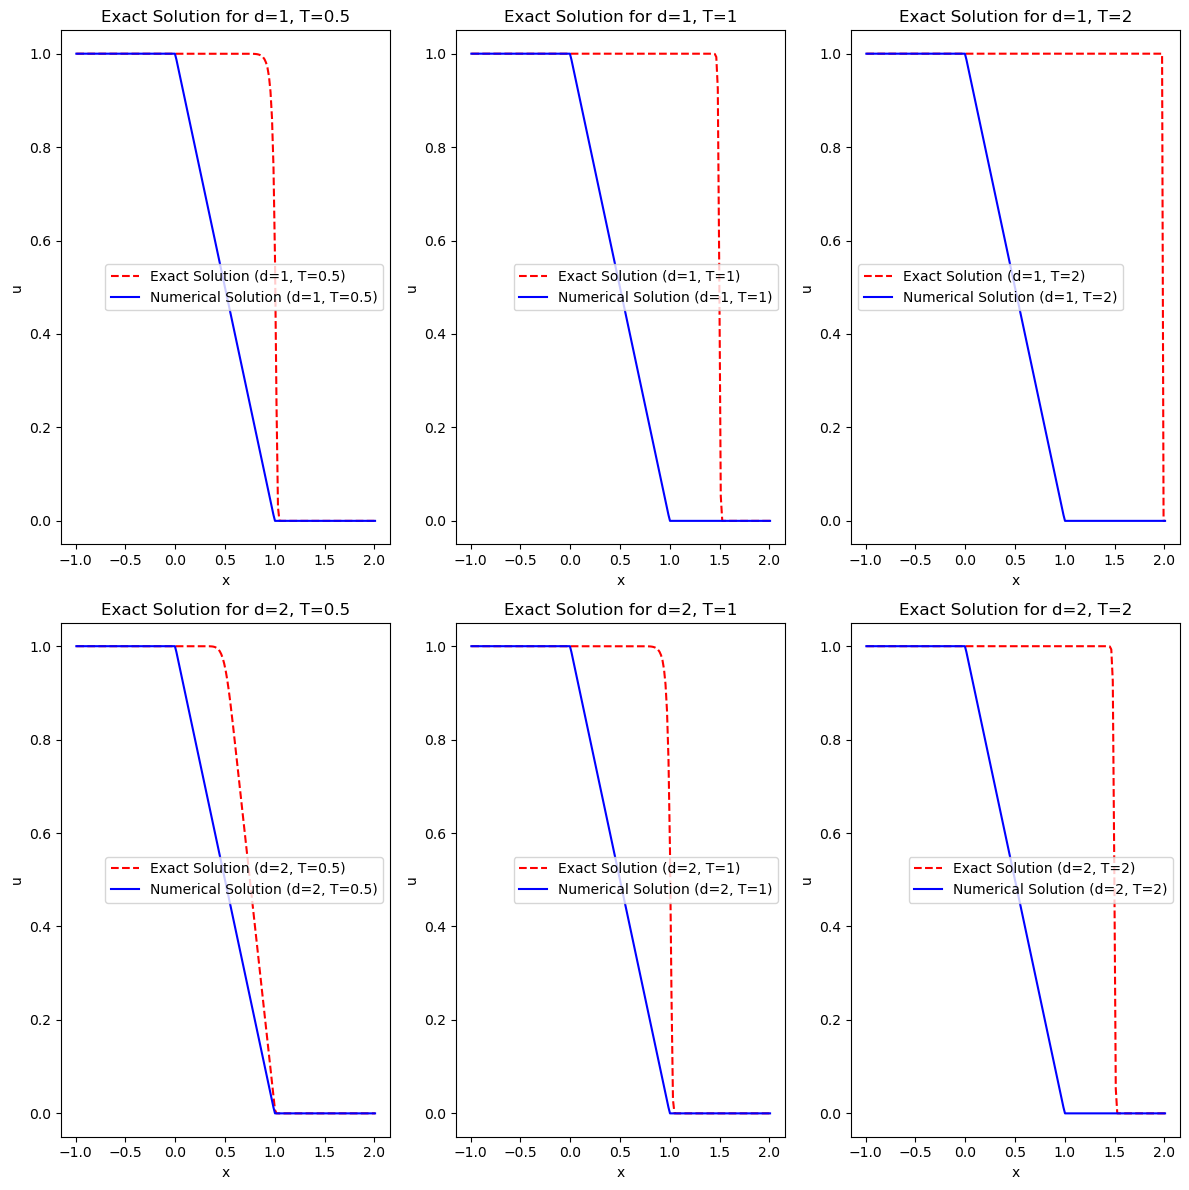

In [21]:
# example to test the our Godunov scheme in the non-linear case 
# Parameters
b = 2.0
a = -1.0
N = 200
x = Mesh(N, a, b).get_cell_interfaces()

# Test with different values of d and T
d_values = [1, 2]
T_values = [0.5, 1, 2]

plt.figure(figsize=(12, 12))

for i, d in enumerate(d_values):
    for j, T in enumerate(T_values):
        x, u_approx = Godunov_scheme(N, a, b, T, d)
        u0 = exact_nonlin_transport(x, 0, N, d)
        plt.subplot(len(d_values), len(T_values), i * len(T_values) + j + 1)
        plt.plot(x, u_approx, 'r--', label=f'Exact Solution (d={d}, T={T})')
        plt.plot(x, u0, 'b-', label=f'Numerical Solution (d={d}, T={T})')
        plt.xlabel('x')
        plt.ylabel('u')
        plt.title(f'Exact Solution for d={d}, T={T}')
        plt.legend()

plt.tight_layout()
plt.show()

(d) Compare the exact solution from $(a)$ with the numerical solution obtained in $(c)$ by plotting the obtained solutions at $( T = 2 )$ for $( d = 1, 2 )$.

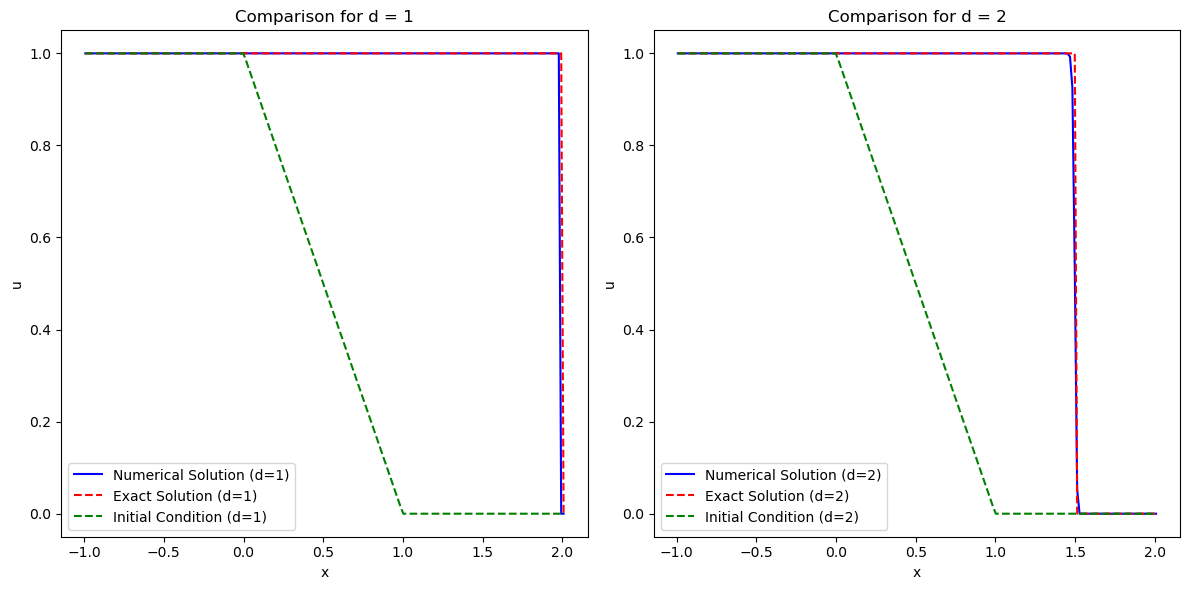

In [22]:
# Parameters
b = 2.0
a = -1.0
T = 2
N = 200

# d take two values 1 and 2
d_values = [1, 2]

plt.figure(figsize=(12, 6))

for i, d in enumerate(d_values):
    # Numerical solution
    x, u_approx = Godunov_scheme(N, a, b, T, d)
    
    # Exact solution
    u_exact = exact_nonlin_transport(x, T, N, d)
    
    # initial condition
    
    u0 = exact_nonlin_transport(x, 0, N, d)
    
    # Plotting
    plt.subplot(1, 2, i + 1)
    plt.plot(x, u_approx, 'b-', label='Numerical Solution (d={})'.format(d))
    plt.plot(x, u_exact, 'r--', label='Exact Solution (d={})'.format(d))
    plt.plot(x, u0, 'g--', label='Initial Condition (d={})'.format(d))
    plt.xlabel('x')
    plt.ylabel('u')
    plt.title('Comparison for d = {}'.format(d))
    plt.legend()

plt.tight_layout()
plt.show()


The numerical solution obtained in both cases converges to the exact solution. This is evident from the plots, as the errors go to zero in both cases with the data I've chosen.

Compare both cases. What do you notice? What parameters could be changed in the computational set-up and how, except $( d )$, to yield the same numerical solution at the final time?

In [23]:
# Calculate the L1 error for the non-linear case in this cases

errors = []
# Calculate errors for each d value
for d in d_values:
    # Numerical solution
    x, u_approx = Godunov_scheme(N, a, b, T, d)
    
    # Exact solution
    u_exact = exact_nonlin_transport(x, T, N, d)
    
    # Calculate L1 error
    error = L1_error(u_approx, u_exact, dx)
    errors.append(error)

# Print the errors in scientific format
for i, d in enumerate(d_values):
    print(f"L1 error for d={d}: {errors[i]:.2e}")

L1 error for d=1: 6.25e-04
L1 error for d=2: 3.79e-04


In the case when $ d = 1 $, the solution remains 1 over the space $ x $ except at the point where $ x = 1 $, where the solution is 0. In contrast, in the second case when $ d = 2 $, the solution remains 1 over the interval $[-1, 1.5]$, and after that, the solution is 0. Both solutions show a sharp discontinuity shock propagating through the domain, but the shock location differs slightly between $d=1$ and $d=2$, with the shock for $d=2$ occurring at a slightly different x-position compared to $d=1$.  We see also the errors is different for $d = 2$ is small then $ d = 1 $ 

I observe that $ d $ plays an important role in the solution obtained.

Except $( d )$, to yield the same numerical solution at the final time, we can experiment with some parameters. The spatial steps and time steps can be adjusted manually to observe their effects on the solution. For example in our cases i take the time with $ CFL = \frac{dt}{dx}= \frac{d}{4}$ becouse the maximum of the function $f$ is $\frac{2}{d}$